In [2]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [3]:
import pandas as pd

checkout = pd.read_csv(path_data+'checkout.csv')
checkout.head()

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1.0,F,chrome,66.168628
1,1,876599,A,NaN,0.0,M,firefox,49.801887
2,2,905407,A,27.446845,1.0,M,chrome,56.744856
3,3,883562,A,30.602233,1.0,M,safari,71.890718
4,4,840542,A,29.668895,1.0,F,safari,67.410696


In [5]:
# exercise 01

"""
T-test for difference in means

Imagine that you are a Data Scientist at an e-commerce company where you were tasked with running an experiment to help the payments team decide which checkout page design yields higher order value and fastest purchase decision time. Assuming you already estimated the required sample size per variant and successfully passed all the sanity checks, you will analyze the differences in average order_value and time_on_page metrics between the checkout_page variants, and make a decision on the best performing design.

checkout DataFrame is available for you and pingouin has been loaded along with pandas and numpy.
"""

# Instructions

"""

    Calculate the mean order_value per variant, and run a t-test for difference in order_value between variants A and B.
---
    Calculate the mean time_on_page per variant, run a t-test for its difference between variants A and B, and note the p-value and confidence interval of the difference. Will you reject the Null hypothesis?
---
    Calculate the mean time_on_page per variant, run a t-test for its difference between variants A and C, and note the p-value and confidence interval of the difference. Will you reject the Null hypothesis?

"""

# solution
import pingouin

# Calculate the mean order values and run a t-test between variants A and B
print(checkout.groupby('checkout_page')['order_value'].mean())

ttest = pingouin.ttest(x=checkout[checkout['checkout_page']=='A']['order_value'], 
                       y=checkout[checkout['checkout_page']=='B']['order_value'],
                       paired=False,
                       alternative="two-sided")

print(ttest)

#----------------------------------#

# Calculate the mean time on page and run a t-test between variants A and B
print(checkout.groupby('checkout_page')['time_on_page'].mean())

ttest = pingouin.ttest(x=checkout[checkout['checkout_page']=='A']['time_on_page'], 
                       y=checkout[checkout['checkout_page']=='B']['time_on_page'],
                       paired=False,
                       alternative="two-sided")
print(ttest)

#----------------------------------#

# Run a t-test for time_on_page between variants A and C
ttest = pingouin.ttest(x=checkout[checkout['checkout_page']=='A']['time_on_page'], 
                       y=checkout[checkout['checkout_page']=='C']['time_on_page'],
                       paired=False,
                       alternative="two-sided")
print(ttest)

#----------------------------------#

# Conclusion

"""
Great work analyzing these differences! All of the differences were statistically significant with page design C having the highest order_value and shortest time_on_page. But notice how we made multiple comparisons and analyzed multiple metrics using the same experiment data. Is there something we need to account for?
"""

checkout_page
A    24.956437
B    29.876202
C    34.917589
Name: order_value, dtype: float64
                T          dof alternative          p-val           CI95%  \
T-test -32.285094  3110.673039   two-sided  1.772895e-197  [-5.22, -4.62]   

         cohen-d       BF10  power  
T-test  0.901468  5.07e+203    1.0  
checkout_page
A    44.668527
B    42.723772
C    42.223772
Name: time_on_page, dtype: float64
               T   dof alternative         p-val        CI95%   cohen-d  \
T-test  7.026673  5998   two-sided  2.349604e-12  [1.4, 2.49]  0.181428   

             BF10  power  
T-test  1.305e+09    1.0  
               T   dof alternative         p-val        CI95%   cohen-d  \
T-test  8.833244  5998   two-sided  1.316118e-18  [1.9, 2.99]  0.228073   

             BF10  power  
T-test  1.811e+15    1.0  


'\nGreat work analyzing these differences! All of the differences were statistically significant with page design C having the highest order_value and shortest time_on_page. But notice how we made multiple comparisons and analyzed multiple metrics using the same experiment data. Is there something we need to account for?\n'

In [7]:
homepage = pd.read_csv(path_data+'homepage.csv')
homepage.head()

,Unnamed: 0,user_id,landing_page,signup,time_on_page
0,0,511265,A,0.0,36.466340
1,1,369773,A,1.0,27.601022
2,2,433024,A,0.0,31.361797
3,3,214829,A,0.0,39.565806
4,4,77688,A,0.0,37.139127


In [8]:
# exercise 02

"""
Pairwise t-tests

Manually running separate comparisons using individual t-tests can be a pain as the number of groups gets larger. Thankfully, the pingouin package's .pairwise_tests() method can make things easier.

You will explore the differences in average time-on-page metric between four different landing page variants loaded in the homepage DataFrame.

The dataset homepage is available and has the columns signup and time_on_page. Every row in the DataFrame corresponds to a unique user visiting the respective landing_page. The signup column consists of binary data: '1' means the user signed up and '0' means abandoned the page, and the time_on_page column represents the time (in seconds) each user spent on the landing page before abandoning or signing up . pingouin has been loaded along with pandas and numpy.
"""

# Instructions

"""

    Perform pairwise t-tests on homepage's time_on_page variable, grouped by landing_page, without doing any p-value adjustment.
---

    Perform pairwise t-tests on homepage's time_on_page variable, grouped by landing_page, with a Bonferroni correction.
---
Question

    With a 0.05 significance threshold and applying a Bonferroni correction, what will our decision be?

Possible answers:
    Fail to reject the Null hypothesis that landing pages B and C have the same average time_on_page. {Answer}

    Reject the Null hypothesis that landing pages B and C have the same average time_on_page.
"""

# solution

# Perform a pairwise t-test on signup, grouped by landing-page
pairwise = pingouin.pairwise_tests(data=homepage,
                                   dv="time_on_page",
                                   between="landing_page",
                                   padjust="none")

print(pairwise)

# Modify the pairwise t-tests to use Bonferroni p-value adjustment
bonferroni_pairwise = pingouin.pairwise_tests(data=homepage,
                                   dv="time_on_page",
                                   between="landing_page",
                                   padjust="bonf")

print(bonferroni_pairwise)

#----------------------------------#

# Conclusion

"""
That is correct! After accounting for multiple comparisons, we can no longer conclude that the difference in average time_on_page is statistically significant based on a 5% significance threshold.
"""

       Contrast  A  B  Paired  Parametric          T     dof alternative  \
0  landing_page  A  B   False        True -11.101771  5398.0   two-sided   
1  landing_page  A  C   False        True  -7.599218  5398.0   two-sided   
2  landing_page  A  D   False        True -24.158902  5398.0   two-sided   
3  landing_page  B  C   False        True   2.607544  5398.0   two-sided   
4  landing_page  B  D   False        True -11.677126  5398.0   two-sided   
5  landing_page  C  D   False        True -13.537635  5398.0   two-sided   

           p-unc        BF10    hedges  
0   2.487065e-28   7.612e+24 -0.302110  
1   3.491413e-14    8.45e+10 -0.206796  
2  1.572433e-122  3.829e+118 -0.657431  
3   9.144539e-03       0.908  0.070958  
4   3.939969e-31   4.509e+27 -0.317767  
5   4.364058e-41   3.354e+37 -0.368397  
       Contrast  A  B  Paired  Parametric          T     dof alternative  \
0  landing_page  A  B   False        True -11.101771  5398.0   two-sided   
1  landing_page  A  C   Fals

'\nThat is correct! After accounting for multiple comparisons, we can no longer conclude that the difference in average time_on_page is statistically significant based on a 5% significance threshold.\n'

# Parametric or non-parametric?

In order to leverage the parametric tests for statistical significance we need to confirm that our assumptions about randomness, normality, and independence are satisfied. Most online experiments run in-practice will satisfy these assumptions for large traffic sizes. However, depending on your experimentation field and industry, it is not uncommon to come across cases where any of the assumptions is in violation. When this is the case, it is safer to go with the appropriate non-parametric test that doesn't require strict assumptions about the data.

![Answer](/home/nero/Documents/Estudos/DataCamp/Python/courses/ab-testing-in-python/parametric.png)

In [10]:
# exercise 03

"""
Mann-Whitney U test

Let's assume that you are an Analytics Engineer at an early-stage start-up where the traffic size to your website is small. Since in many cases you will need to run the tests for a long duration to gather a sample size that is large enough to satisfy parametric tests' assumptions, you may need to lean on non-parametric tests to make faster decisions.

One of these tests is the Mann-Whitney U test, which is a statistical significance test used to determine if two independent samples were drawn from a population with the same distribution. You will leverage this test to analyze the difference in time_on_page between two groups of the checkout dataset. The checkout DataFrame is available for you and pingouin has been loaded along with pandas and numpy.
"""

# Instructions

"""

    Calculate the mean and rows count of the time_on_page column for each variant in one step.
---

    Take a random sample of size 25 from checkout_pages "B" and "C" time_on_page column and assign them to their respective variables.
---


    Run a Mann-Whitney U test for statistical significance on the two sampled columns.

"""

# solution

import numpy as np

# Calculate the mean and count of time on page by variant
print(checkout.groupby('checkout_page')['time_on_page'].agg({'mean', 'count'}))

np.random.seed(40)

# Take a random sample of size 25 from each variant
ToP_samp_B = checkout[checkout['checkout_page'] == 'B'].sample(25)['time_on_page']
ToP_samp_C = checkout[checkout['checkout_page'] == 'C'].sample(25)['time_on_page']

# Run a Mann-Whitney U test
mwu_test = pingouin.mwu(x=ToP_samp_B,
                        y=ToP_samp_C,
                        alternative='two-sided')

print(mwu_test)

#----------------------------------#

# Conclusion

"""
Great job! The p-value of 0.046 suggests the decision to reject or fail to reject the the Null hypothesis that the sample means are drawn from the same distribution may need to include other factors.
"""

                    mean  count
checkout_page                  
A              44.668527   3000
B              42.723772   3000
C              42.223772   3000
     U-val alternative     p-val     RBC    CLES
MWU  416.0   two-sided  0.045663 -0.3312  0.6656


'\nGreat job! The p-value of 0.046 suggests the decision to reject or fail to reject the the Null hypothesis that the sample means are drawn from the same distribution may need to include other factors.\n'

In [11]:
# exercise 04

"""
Chi-square test for independence

When it comes to examining statistical dependence on categorical variables without relying on parametric assumptions, chi-square test for independence is a great fit. Examine the signup rate metric's dependence on the landing pages of the homepage dataset by looking at groups A and B only.

The homepage dataset is loaded for you along with the necessary imports.
"""

# Instructions

"""

    Calculate the number of unique users in landing_pages A and B.
---

    Calculate the total signups for each of variants A and B.
---

    Create the contingency table of signups and no signups for the two variants and calculate the signup rates.
---

    Calculate the chi-square test's p-value.

"""

# solution

from scipy import stats

# Calculate the number of users in groups A and B
n_A = homepage[homepage['landing_page'] == 'A']['user_id'].nunique()
n_B = homepage[homepage['landing_page'] == 'B']['user_id'].nunique()

# Compute unique signups in each group
signup_A = homepage[homepage['landing_page'] == 'A'].groupby('user_id')['signup'].max().sum()
no_signup_A = n_A - signup_A
signup_B = homepage[homepage['landing_page'] == 'B'].groupby('user_id')['signup'].max().sum()
no_signup_B = n_B - signup_B

# Create the signups table
table = [[signup_A, no_signup_A], [signup_B, no_signup_B]]
print('Group A signup rate:',round(signup_A/n_A,3))
print('Group B signup rate:',round(signup_B/n_B,3))

# Calculate p-value
print('p-value=',stats.chi2_contingency(table,correction=False)[1])

#----------------------------------#

# Conclusion

"""
Great job running this non-parametric test! The p-value seems quite large and the rates are close. This means that we have no evidence to believe that the rates between the groups are different or depend on these landing page variants.
"""

Group A signup rate: 0.052
Group B signup rate: 0.053
p-value= 0.9029562653802401


'\nGreat job running this non-parametric test! The p-value seems quite large and the rates are close. This means that we have no evidence to believe that the rates between the groups are different or depend on these landing page variants.\n'

# Delta or not?

When you analyze ration metrics, sometimes the analyzed unit in the metric of interest is more granular than the randomization unit. For instance, we can randomize on user_id and try to examine the impact of our changes on per session or page view metrics. This violates some of the assumptions around the calculation of the variance which we use in significance tests. The Delta method can help account for this discrepancy.

![Answer](/home/nero/Documents/Estudos/DataCamp/Python/courses/ab-testing-in-python/delta.png)

**We only need to use the Delta method if our ratio metric has different units of analysis and randomization.**

In [13]:
def var_delta(x,y): 
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    x_var = np.var(x,ddof=1)
    y_var = np.var(y,ddof=1)
    cov_xy = np.cov(x,y,ddof=1)[0][1]    
    var_ratio = (x_var/y_bar**2 + y_var*(x_bar**2/y_bar**4) - 2*cov_xy*(x_bar/y_bar**3))/len(x)
    return var_ratio

In [12]:
def ztest_delta(x_control,y_control,x_treatment,y_treatment, alpha = 0.05):
    mean_control = x_control.sum()/y_control.sum()
    mean_treatment = x_treatment.sum()/y_treatment.sum()
    var_control = var_delta(x_control, y_control)
    var_treatment = var_delta(x_treatment, y_treatment)
    diff = mean_treatment - mean_control
    var = var_control + var_treatment
    # Calculate the two-tailed critical value
    cv = stats.norm.ppf(1-alpha/2)
    # Calculate the z_stat
    z_stat = diff/np.sqrt(var)
    # Calculate the p-value
    p_val = stats.norm.sf(abs(z_stat)) * 2.0
    # Calculate confidence intervals of the difference
    stde = cv*np.sqrt(var)
    lower = diff - stde 
    upper = diff + stde
    result = {'mean_control':mean_control,
              'mean_treatment':mean_treatment,
              'difference':round(diff, 3),
              'diff_CI':"["+str(round(lower,3))+", "+str(round(upper,3))+"]",
              'p-value':p_val}
    return result

In [15]:
# exercise 05

"""
Delta method

Delta method is one of the most practical A/B testing applications. As a Data Scientist you are going to encounter cases where the user assignment per variant is based on user_id to create a consistent experience, while the unit of analysis is something more granular such as a page view or a session.

In this exercise you will analyze the difference in total order_value per page_view ratio metric between variants A and C. The checkout DataFrame is loaded for you along with pandas, numpy, and the pre-defined functions for estimating ratio metrics variance var_delta() and ratio metrics z-test ztest_delta().
"""

# Instructions

"""

    Define the user-level ratio components for each of the variants A and C with the numerator of total order_value per user_id as the order_value column, and denominator as count of user_id as the page_view column.
---

    Assign the ratio columns to the respective control and treatment numerator and denominator of our defined ratio metric of average order_value per page_view.
---
    Run a z-test for the ordervalue per pageview metric
"""

# solution

# Create DataFrames for per user metrics for variants A and C
A_per_user = pd.DataFrame({'order_value':checkout[checkout['checkout_page']=='A'].groupby('user_id')['order_value'].sum()
                            ,'page_view':checkout[checkout['checkout_page']=='A'].groupby('user_id')['user_id'].count()})

C_per_user = pd.DataFrame({'order_value':checkout[checkout['checkout_page']=='C'].groupby('user_id')['order_value'].sum()
                           ,'page_view':checkout[checkout['checkout_page']=='C'].groupby('user_id')['user_id'].count()})

# Assign the control and treatment ratio columns 
x_control = A_per_user['order_value']
y_control = A_per_user['page_view']
x_treatment = C_per_user['order_value']
y_treatment = C_per_user['page_view']

# Run a z-test for ratio metrics
print(ztest_delta(x_control,y_control,x_treatment,y_treatment))

#----------------------------------#

# Conclusion

"""
Excellent work! The p-value is practically zero with a mean difference of almost $10 higher for group C. This gives us much more confidence in rolling out checkout page design C since our ratio metric of average order_value per page_view incorporates both the design's effect on order value and purchase rate.
"""

{'mean_control': 20.472597188012, 'mean_treatment': 30.29682804716834, 'difference': 9.824, 'diff_CI': '[9.25, 10.398]', 'p-value': 1.5695484218904422e-246}


"\nExcellent work! The p-value is practically zero with a mean difference of almost $10 higher for group C. This gives us much more confidence in rolling out checkout page design C since our ratio metric of average order_value per page_view incorporates both the design's effect on order value and purchase rate.\n"

# Best practices

    In practical A/B testing scenarios, one must pay attention to several best practices and avoid common pitfalls in order to make clean conclusions about the results. Select all the answers that exhibit A/B testing best practices.
### Possible Answers

Running an e-commerce A/B test for a full week even though it requires a sample size of 3 days of online traffic. {Correct}


The product manager is impatient, so decides to change three variables in one A/B test while expecting to measure the impact of each change separately.


The mobile app team came up with a complicated feature idea. There is a lot of uncertainty regarding its impact, but the team decided to build out the full feature to run the test.


The lead data scientist on a critical A/B test encouraged the team to not make a decision by peeking at the results before reaching the required sample size. {Correct}

In [16]:
novelty = pd.read_csv(path_data+'novelty.csv')
novelty.head()

,Unnamed: 0,date,CTR_lift,ToP_lift,purchase_rate,CTR
0,0,2023-01-01,0.060,15.0,0.030,0.052
1,1,2023-01-02,0.055,14.0,0.020,0.050
2,2,2023-01-03,0.050,11.0,0.022,0.052
3,3,2023-01-04,0.035,7.0,0.020,0.050
4,4,2023-01-05,0.040,8.0,0.020,0.050


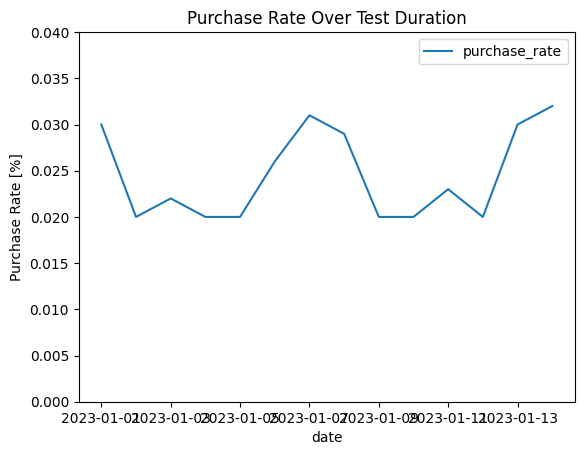

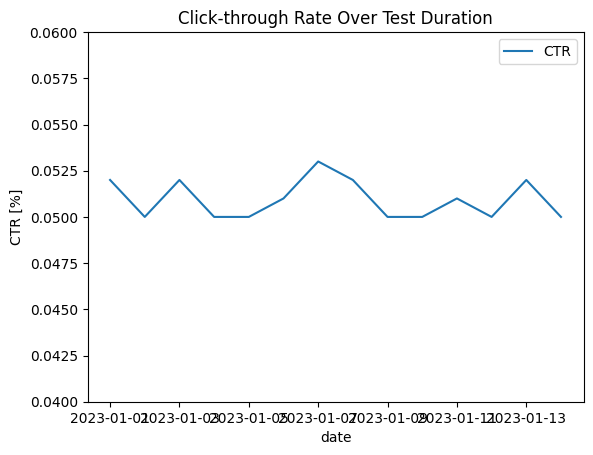

'\nCorrect! It is advisable to run the full-week cycle especially for metrics with distinct weekend behavior.\n'

In [19]:
# exercise 06

"""
Day-of-the-week effect

Although A/B testing enables us to control for external variables such weather and holidays, some treatments may have stronger or weaker effects than others that need to be included to fully capture the user behavior around fluctuating periods. Depending on the tracked metric, you may need to consider running your A/B tests for full weekly increments. Some metrics exhibit seasonality and are affected by holidays, weekends, etc. while others don't fluctuate as much. It is up to you as the data scientist to advise the team on whether they can stop the test upon reaching the required sample size, or extend by a few days to cover seasonal effects such as day-of-the-week.

Examine the novelty dataset that is loaded for you to select the metrics that need to run for weekly increments. pandas and matplotlib are also loaded for you.
"""

# Instructions

"""

    Create a line plot of the purchase_rate column over the date period of the test.
---

    Adjust the line plot to show CTR column over the date period of the test and title it 'Click-through Rate Over Test Duration' with ylabel 'CTR [%]' and ylim of 0.04 to 0.06.
---
Question

    Which metric(s) need to capture the full weekly cycle?

Possible answers:

    The purchase_rate metric needs to capture the full week since it fluctuated consistently at relatively higher levels than its baseline around weekends. {Answer}

    The CTR metric needs to capture the full week due to its distinct behavior around weekends.

    None of the metrics need to capture the full week effects since A/B testing isn't impacted by externalities.
"""

# solution
import matplotlib.pyplot as plt

# Create a line plot
novelty.plot('date', 'purchase_rate')
plt.title('Purchase Rate Over Test Duration')
plt.ylabel('Purchase Rate [%]')
plt.ylim([0, 0.04])
plt.show()

#----------------------------------#

# Adjust the line plot
novelty.plot('date', 'CTR')
plt.title('Click-through Rate Over Test Duration')
plt.ylabel('CTR [%]')
plt.ylim([0.04, 0.06])
plt.show()

#----------------------------------#

# Conclusion

"""
Correct! It is advisable to run the full-week cycle especially for metrics with distinct weekend behavior.
"""